In [2]:
import rasterio
import geopandas as gpd
import shapely
from rasterio.features import shapes
from rasterio.mask import mask
import datetime

def save_fm(vuelo, z):
    ds = rasterio.open(f'FM/fm_{vuelo}_zona{z}.tif')
    s = shapes(rasterio.band(ds, 1))
    
    kwds = ds.profile
    kwds['dtype'] = 'int16'
    
    zonas = gpd.read_file('shp/zonas_estudio.shp')
    zona = zonas[zonas.Id == z]
    
    a, b = mask(
        ds, 
        [zona.iloc[0].geometry],
        nodata=-9999
    )
    
    with rasterio.open(f'FINALES/FM/fm_{vuelo}_zona{z}.tif', 'w', **kwds) as d:
        d.write(a)

In [35]:
for vuelo in ['vuelo2', 'lida2', 'lida3']:
    for z in [1, 2, 3]:
        save_fm(vuelo, z)

In [5]:
import rasterio
import geopandas as gpd
import shapely
from rasterio.features import shapes
from rasterio.mask import mask
import pandas as pd 

carga = {1: 1.5, 2:7.5, 3: 5, 4: 30, 5: 7, 6: 12.5, 7: 12.5, 9: 8}

def get_load(vuelo, z):
    ds = rasterio.open(f'FINALES/FM/fm_{vuelo}_zona{z}.tif')
    s = shapes(rasterio.band(ds, 1))
    
    g = list(s)
    
    geom = [shapely.geometry.shape(i[0]) for i in g]
    geom = gpd.GeoSeries(geom, crs=ds.crs)
    geom
    
    values = [i[1] for i in g]
    values = pd.Series(values)
    values
    
    result = gpd.GeoDataFrame({'value': values, 'geometry': geom})
    result = result[result.value > 0]
    
    result['area'] = result.apply(lambda x: x.geometry.area, axis=1)
    result = result[['value', 'area']].groupby('value').sum().reset_index()
    
    return result.apply(lambda x: x.area * carga[x.value] / 10_000, axis=1).sum()

In [22]:
vuelos = {'lida2': datetime.datetime(2017, 10, 10), 
          'vuelo1': datetime.datetime(2024, 8, 23),  
          'lida3': datetime.datetime(2024, 9, 1), 
          'vuelo2': datetime.datetime(2025, 10, 2)}

# Zona 1

\begin{tabular}{rl}
\toprule
carga & fecha \\
\midrule
160.510000 & 10/10/2017 \\
76.790000 & 23/08/2024 \\
74.535000 & 01/09/2024 \\
82.610000 & 02/10/2025 \\
\bottomrule
\end{tabular}


<Axes: xlabel='fecha'>

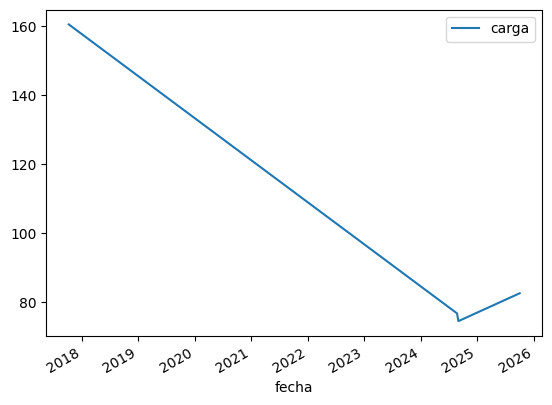

In [23]:
from IPython.display import Markdown, display, Latex
z = 1
load = []
for v in vuelos.keys():
    load.append(get_load(v, z))

load_df = pd.DataFrame({'carga': load, 'fecha': list(vuelos.values())})
display(Markdown(load_df.to_latex(index=False, formatters={'fecha': '{:%d/%m/%Y}'})))
load_df.plot(x='fecha')

\pagebreak

# Zona 2

\begin{tabular}{rl}
\toprule
carga & fecha \\
\midrule
40.170000 & 10/10/2017 \\
42.280000 & 23/08/2024 \\
36.575000 & 01/09/2024 \\
35.085000 & 02/10/2025 \\
\bottomrule
\end{tabular}


<Axes: xlabel='fecha'>

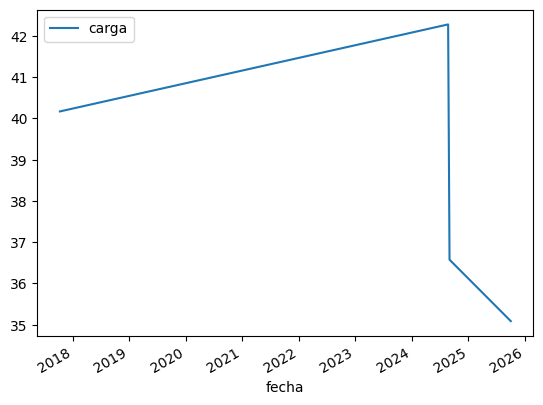

In [24]:
z = 2
load = []
for v in vuelos.keys():
    load.append(get_load(v, z))

load_df = pd.DataFrame({'carga': load, 'fecha': list(vuelos.values())})
display(Markdown(load_df.to_latex(index=False, formatters={'fecha': '{:%d/%m/%Y}'})))
load_df.plot(x='fecha')

\pagebreak

# Zona 3

In [25]:
vuelos = {'lida2': datetime.datetime(2017, 10, 10), 
          'lida3': datetime.datetime(2024, 9, 1), 
          'vuelo2': datetime.datetime(2025, 10, 17)}

\begin{tabular}{rl}
\toprule
carga & fecha \\
\midrule
254.825000 & 10/10/2017 \\
205.330000 & 01/09/2024 \\
211.845000 & 17/10/2025 \\
\bottomrule
\end{tabular}


<Axes: xlabel='fecha'>

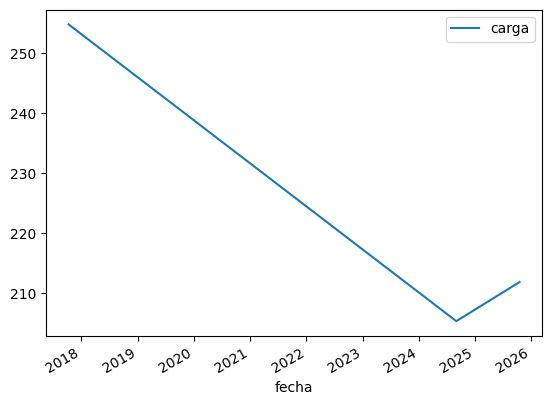

In [26]:
z = 3
load = []
for v in vuelos.keys():
    load.append(get_load(v, z))

load_df = pd.DataFrame({'carga': load, 'fecha': list(vuelos.values())})
display(Markdown(load_df.to_latex(index=False, formatters={'fecha': '{:%d/%m/%Y}'})))
load_df.plot(x='fecha')